### ML Insights & Anomaly Detection (Amazon Product Data)


#### Step 1: Install and Import Required Libraries

In [1]:
!pip install pandas matplotlib seaborn scikit-learn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sns.set(style="whitegrid")

####  Step2: Load Your Dataset

In [3]:
df = pd.read_csv("C:\\Users\\neeraj\\Downloads\\amazon.csv")
df.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


#### step3: Basic Data Cleaning and Preparation

In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [5]:
#Handling Misiing Values

In [5]:
df.dropna(inplace=True)

#### step4:Convertions

In [6]:
#Convert Price Columns to Numeric
def clean_price(price):
    if isinstance(price, str):
        return float(price.replace('₹', '').replace(',', ''))
    return float(price)

df['discounted_price'] = df['discounted_price'].apply(clean_price)
df['actual_price'] = df['actual_price'].apply(clean_price)

In [7]:
#Convert Discount Percentage to Numeric
def clean_discount(discount):
    if isinstance(discount, str):
        return float(discount.replace('%', '')) / 100.0
    return float(discount) / 100.0

df['discount_percentage'] = df['discount_percentage'].apply(clean_discount)

In [8]:
#To verify
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [9]:
#Examine the rating Column
print(df['rating'].unique())

['4.2' '4.0' '3.9' '4.1' '4.3' '4.4' '4.5' '3.7' '3.3' '3.6' '3.4' '3.8'
 '3.5' '4.6' '3.2' '5.0' '4.7' '3.0' '2.8' '4' '3.1' '4.8' '2.3' '|' '2'
 '3' '2.6' '2.9']


In [10]:
#Clean the rating Column
def clean_rating(rating):
    if isinstance(rating, str):
        parts = rating.split('|')
        if parts:
            try:
                return float(parts[0])
            except ValueError:
                return np.nan
        else:
            return np.nan
    try:
        return float(rating)
    except ValueError:
        return np.nan

df['rating_cleaned'] = df['rating'].apply(clean_rating)
df.dropna(subset=['rating_cleaned'], inplace=True)
df['rating_cleaned'] = df['rating_cleaned'].astype(float)

### Step 5: ML-Based Insights - Predicting Rating

In [14]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'rating_cleaned'],
      dtype='object')

In [15]:
def train_rating_prediction_model(df):
    """
    Trains a model to predict the rating of a product based on its actual price and discounted price.
    """
    # Define features and target variable
    features = ['actual_price', 'discounted_price']
    target = 'rating'

    # Separate features and target variable
    X = df[features]
    y = df[target]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Random Forest Regressor model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error (Rating Prediction): {mse}")

    # Feature importances
    feature_importances = model.feature_importances_
    print("\nFeature Importances:")
    for feature, importance in zip(features, feature_importances):
        print(f"{feature}: {importance}")

    return model


In [16]:
def predict_rating(model, actual_price, discounted_price):
    """
    Predicts the rating of a product using the trained model.
    """
    try:
        actual_price = float(actual_price)
        discounted_price = float(discounted_price)

        if actual_price < 0 or discounted_price < 0:
            return "Invalid input. Please enter positive values for actual price and discounted price."

        # Use the trained model to predict
        predicted_rating = model.predict([[actual_price, discounted_price]])[0]
        return f"The predicted rating is: {predicted_rating:.2f}"

    except ValueError:
        return "Invalid input. Please enter numeric values."

In [17]:
def main():
    """
    Main function to train the model and allow the user to input values for prediction.
    """
    # Train the model
    model = train_rating_prediction_model(df.copy())  # Pass a copy to avoid modifying the original DataFrame

    # User input for prediction
    actual_price = input("Enter the actual price: ")
    discounted_price = input("Enter the discounted price: ")

    # Predict and print the rating
    result = predict_rating(model, actual_price, discounted_price)
    print(result)

if __name__ == "__main__":
    main()

Mean Squared Error (Rating Prediction): 0.08225234947453615

Feature Importances:
actual_price: 0.45034392203028617
discounted_price: 0.5496560779697138
Enter the actual price: 1200
Enter the discounted price: 230
The predicted rating is: 4.12


C:\Users\neeraj\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Step 6: Anomaly Detection - Identifying Unusual Product Price Combinations


Anomaly Counts (Based on Price):
price_anomaly
Normal     1388
Anomaly      74
Name: count, dtype: int64


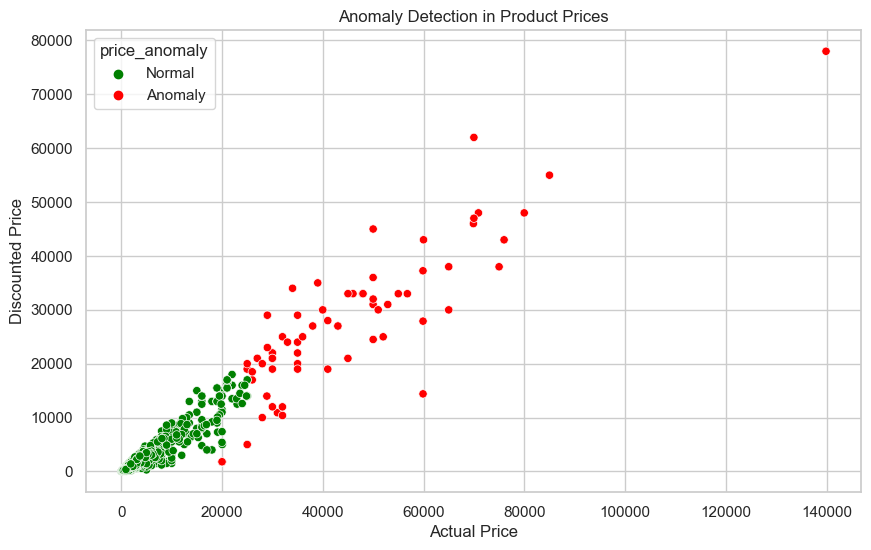

In [13]:
price_features = ['discounted_price', 'actual_price']
X_price = df[price_features]

iso = IsolationForest(contamination=0.05, random_state=42)
df['price_anomaly'] = iso.fit_predict(X_price)
df['price_anomaly'] = df['price_anomaly'].map({1: 'Normal', -1: 'Anomaly'})

print("\nAnomaly Counts (Based on Price):")
print(df['price_anomaly'].value_counts())

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='actual_price', y='discounted_price', hue='price_anomaly', palette={'Normal': 'green', 'Anomaly': 'red'})
plt.title('Anomaly Detection in Product Prices')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.show()

### Step 7: Anomaly Detection - Identifying Unusual Rating Counts Relative to Rating



#### Step 7.1: Clean the rating_count Column



In [14]:
def clean_rating_count(count):
    if isinstance(count, str):
        return float(count.replace(',', ''))
    return float(count)

df['rating_count_cleaned'] = df['rating_count'].apply(clean_rating_count)
df.dropna(subset=['rating_count_cleaned'], inplace=True)
df['rating_count_cleaned'] = df['rating_count_cleaned'].astype(float)

print(df[['rating_count', 'rating_count_cleaned']].head())
print(df['rating_count_cleaned'].dtype)

  rating_count  rating_count_cleaned
0       24,269               24269.0
1       43,994               43994.0
2        7,928                7928.0
3       94,363               94363.0
4       16,905               16905.0
float64



Anomaly Counts (Based on Rating and Rating Count):
rating_anomaly
Normal     1389
Anomaly      73
Name: count, dtype: int64


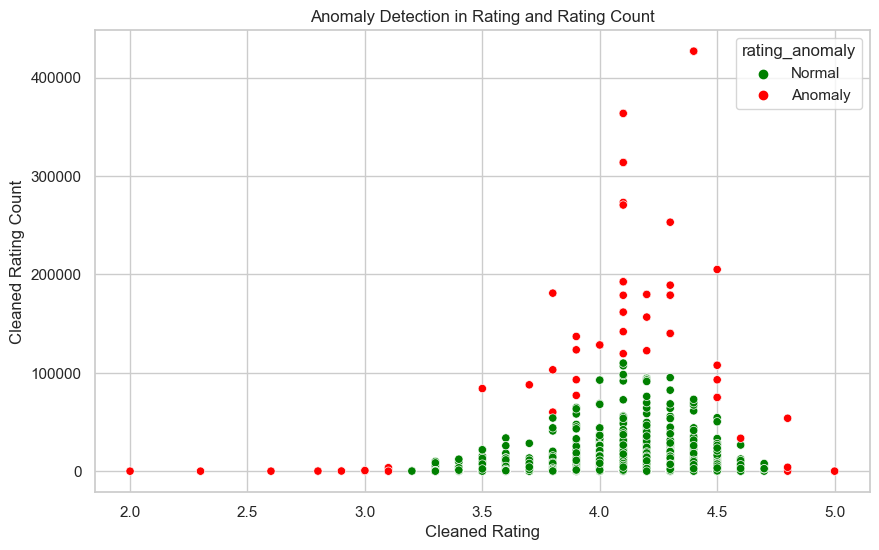

In [15]:
rating_features = ['rating_cleaned', 'rating_count_cleaned'] # Use the cleaned column
X_rating = df[rating_features]

iso_rating = IsolationForest(contamination=0.05, random_state=42)
df['rating_anomaly'] = iso_rating.fit_predict(X_rating)
df['rating_anomaly'] = df['rating_anomaly'].map({1: 'Normal', -1: 'Anomaly'})

print("\nAnomaly Counts (Based on Rating and Rating Count):")
print(df['rating_anomaly'].value_counts())

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='rating_cleaned', y='rating_count_cleaned', hue='rating_anomaly', palette={'Normal': 'green', 'Anomaly': 'red'}) # Use the cleaned column
plt.title('Anomaly Detection in Rating and Rating Count')
plt.xlabel('Cleaned Rating')
plt.ylabel('Cleaned Rating Count') # Update the label
plt.show()

In [19]:
df.to_csv("C:\\Users\\neeraj\\Downloads\\amazon_cleaned.csv")

## Natural Language Processing (NLP)

#### step1: Explore the Text Data

In [16]:
print("Sample Product Names:")
print(df['product_name'].head())
print("\nSample Review Content:")
print(df['review_content'].head())

Sample Product Names:
0    Wayona Nylon Braided USB to Lightning Fast Cha...
1    Ambrane Unbreakable 60W / 3A Fast Charging 1.5...
2    Sounce Fast Phone Charging Cable & Data Sync U...
3    boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...
4    Portronics Konnect L 1.2M Fast Charging 3A 8 P...
Name: product_name, dtype: object

Sample Review Content:
0    Looks durable Charging is fine tooNo complains...
1    I ordered this cable to connect my phone to An...
2    Not quite durable and sturdy,https://m.media-a...
3    Good product,long wire,Charges good,Nice,I bou...
4    Bought this instead of original apple, does th...
Name: review_content, dtype: object


#### Step2: Basic Text Cleaning (Lowercasing and Removing Punctuation)

In [17]:
import string

def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = ''.join([char for char in text if char not in string.punctuation])
        return text
    return ''

df['product_name_cleaned'] = df['product_name'].apply(clean_text)
df['review_content_cleaned'] = df['review_content'].apply(clean_text)

print("\nCleaned Sample Product Names:")
print(df['product_name_cleaned'].head())
print("\nCleaned Sample Review Content:")
print(df['review_content_cleaned'].head())


Cleaned Sample Product Names:
0    wayona nylon braided usb to lightning fast cha...
1    ambrane unbreakable 60w  3a fast charging 15m ...
2    sounce fast phone charging cable  data sync us...
3    boat deuce usb 300 2 in 1 typec  micro usb str...
4    portronics konnect l 12m fast charging 3a 8 pi...
Name: product_name_cleaned, dtype: object

Cleaned Sample Review Content:
0    looks durable charging is fine toono complains...
1    i ordered this cable to connect my phone to an...
2    not quite durable and sturdyhttpsmmediaamazonc...
3    good productlong wirecharges goodnicei bought ...
4    bought this instead of original apple does the...
Name: review_content_cleaned, dtype: object


#### Step3: Text Analysis - Word Frequencies

In [18]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def get_word_frequencies(texts):
    all_words = []
    for text in texts:
        words = text.split()
        for word in words:
            if word not in stop_words:
                all_words.append(word)
    return Counter(all_words)

product_name_frequencies = get_word_frequencies(df['product_name_cleaned'])
top_10_product_words = product_name_frequencies.most_common(10)
print("\nTop 10 Most Frequent Words in Product Names (excluding stopwords):")
print(top_10_product_words)


Top 10 Most Frequent Words in Product Names (excluding stopwords):
[('black', 466), ('cable', 399), ('usb', 390), ('charging', 244), ('fast', 209), ('c', 185), ('smart', 172), ('white', 154), ('type', 147), ('tv', 146)]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\neeraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### step4: Text Analysis - Review Sentiment (Basic Approach)

In [19]:
positive_words = ['good', 'great', 'excellent', 'amazing', 'best', 'love', 'happy', 'satisfied', 'fast', 'durable']
negative_words = ['bad', 'terrible', 'awful', 'worst', 'slow', 'poor', 'unhappy', 'disappointed', 'broken', 'useless']

def analyze_sentiment(text):
    if isinstance(text, str):
        words = text.split()
        positive_count = sum(1 for word in words if word in positive_words)
        negative_count = sum(1 for word in words if word in negative_words)
        if positive_count > negative_count:
            return 'Positive'
        elif negative_count > positive_count:
            return 'Negative'
        else:
            return 'Neutral'
    return 'Neutral'

df['review_sentiment_basic'] = df['review_content_cleaned'].apply(analyze_sentiment)

print("\nBasic Review Sentiment Distribution:")
print(df['review_sentiment_basic'].value_counts())


Basic Review Sentiment Distribution:
review_sentiment_basic
Positive    1325
Neutral      108
Negative      29
Name: count, dtype: int64


In [20]:
!pip install --user -U spacy transformers

  Obtaining dependency information for numpy>=1.19.0 from https://files.pythonhosted.org/packages/98/89/0c93baaf0094bdaaaa0536fe61a27b1dce8a505fa262a865ec142208cfe9/numpy-2.2.5-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-2.2.5-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.5-cp311-cp311-win_amd64.whl (12.9 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 2.2.5 which is incompatible.
scipy 1.11.1 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.2.5 which is incompatible.


In [21]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 640.0 kB/s eta 0:00:20
     --------------------------------------- 0.0/12.8 MB 330.3 kB/s eta 0:00:39
     --------------------------------------- 0.0/12.8 MB 330.3 kB/s eta 0:00:39
     --------------------------------------- 0.0/12.8 MB 178.6 kB/s eta 0:01:12
     --------------------------------------- 0.1/12.8 MB 252.2 kB/s eta 0:00:51
     --------------------------------------- 0.1/12.8 MB 286.7 kB/s eta 0:00:45
     --------------------------------------- 0.1/12.8 MB 286.7 kB/s eta 0:00:45
     --------------------------------------- 0.1/12.8 MB 370.8 kB/s eta 0:00:35
     --------------------------------------- 0.1/12.8 MB 370.8 kB/s eta 0:00:35
     --------------------------------------- 0.1/12.8 MB 370.8 kB/s eta 0:00:35
     --------------------------------------- 0.1/12.8 MB 370.8 kB/s eta 0:00:35
     --------------------------------------- 0.1


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 189, in _run_module_as_main
  File "<frozen runpy>", line 148, in _get_module_details
  File "<frozen runpy>", line 112, in _get_module_details
  File "C:\Users\neeraj\anaconda3\Lib\site-packages\spacy\__init__.py", line 6, in <module>
    from .errors import setup_default_warnings
  File "C:\Users\neeraj\anaconda3\Lib\site-packages\spacy\errors.py", line 3, in <module>
    from .compat import Literal
  File "C:\Users\neeraj\anaconda3\Lib\site-packages\spacy\compat.py", line 4, in <module>
   

     --------------------- ------------------ 7.0/12.8 MB 72.8 kB/s eta 0:01:20
     --------------------- ------------------ 7.0/12.8 MB 72.8 kB/s eta 0:01:20
     --------------------- ------------------ 7.0/12.8 MB 72.8 kB/s eta 0:01:20
     --------------------- ------------------ 7.0/12.8 MB 72.8 kB/s eta 0:01:20
     --------------------- ------------------ 7.0/12.8 MB 72.8 kB/s eta 0:01:20
     --------------------- ------------------ 7.0/12.8 MB 72.8 kB/s eta 0:01:20
     --------------------- ------------------ 7.0/12.8 MB 72.8 kB/s eta 0:01:20
     --------------------- ------------------ 7.0/12.8 MB 72.8 kB/s eta 0:01:20
     --------------------- ------------------ 7.0/12.8 MB 72.8 kB/s eta 0:01:20
     --------------------- ------------------ 7.0/12.8 MB 72.8 kB/s eta 0:01:20
     --------------------- ------------------ 7.0/12.8 MB 72.8 kB/s eta 0:01:20
     --------------------- ------------------ 7.0/12.8 MB 72.8 kB/s eta 0:01:20
     --------------------- -------------

In [22]:
import spacy

nlp = spacy.load("en_core_web_sm")

def spacy_analysis(text):
    doc = nlp(text)
    tokens = [token.text for token in doc]
    lemmas = [token.lemma_ for token in doc]
    pos_tags = [token.pos_ for token in doc]
    return {"tokens": tokens, "lemmas": lemmas, "pos_tags": pos_tags}

df['review_spacy'] = df['review_content_cleaned'].apply(spacy_analysis)

print("\nSpaCy Analysis of a Sample Review:")
print(df['review_spacy'].iloc[0])


SpaCy Analysis of a Sample Review:
{'tokens': ['looks', 'durable', 'charging', 'is', 'fine', 'toono', 'complainscharging', 'is', 'really', 'fast', 'good', 'producttill', 'now', 'satisfied', 'with', 'the', 'qualitythis', 'is', 'a', 'good', 'product', ' ', 'the', 'charging', 'speed', 'is', 'slower', 'than', 'the', 'original', 'iphone', 'cablegood', 'quality', 'would', 'recommendhttpsmmediaamazoncomimageswwebp402378t1imagesi81f1zghlsy88jpgproduct', 'had', 'worked', 'well', 'till', 'date', 'and', 'was', 'having', 'no', 'issuecable', 'is', 'also', 'sturdy', 'enoughhave', 'asked', 'for', 'replacement', 'and', 'company', 'is', 'doing', 'the', 'samevalue', 'for', 'money'], 'lemmas': ['look', 'durable', 'charging', 'be', 'fine', 'toono', 'complainscharge', 'be', 'really', 'fast', 'good', 'producttill', 'now', 'satisfied', 'with', 'the', 'qualitythis', 'be', 'a', 'good', 'product', ' ', 'the', 'charge', 'speed', 'be', 'slow', 'than', 'the', 'original', 'iphone', 'cablegood', 'quality', 'would',

In [23]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")

def bert_sentiment(text):
    try:
        truncated_text = text[:512]  # Truncate to the maximum length
        result = sentiment_pipeline(truncated_text)[0]
        return result['label'], result['score']
    except Exception as e:
        return None, None

# Apply BERT sentiment analysis
df['review_sentiment_bert'], df['review_sentiment_score'] = zip(*df['review_content'].apply(bert_sentiment))

print("\nBERT Sentiment Analysis of a Sample Review:")
print(f"Review: {df['review_content'].iloc[0]}")
print(f"Sentiment: {df['review_sentiment_bert'].iloc[0]}, Score: {df['review_sentiment_score'].iloc[0]:.4f}")

print("\nBERT Sentiment Distribution:")
print(df['review_sentiment_bert'].value_counts())

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu



BERT Sentiment Analysis of a Sample Review:
Review: Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original iPhone cable,Good quality, would recommend,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/81---F1ZgHL._SY88.jpg,Product had worked well till date and was having no issue.Cable is also sturdy enough...Have asked for replacement and company is doing the same...,Value for money
Sentiment: POSITIVE, Score: 0.9841

BERT Sentiment Distribution:
review_sentiment_bert
POSITIVE    899
NEGATIVE    563
Name: count, dtype: int64
